In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('played_out_cleaned.csv')


In [210]:
df.keys()


Index(['Unnamed: 0', 'position', 'played_at', 'duration_ms', 'explicit',
       'track_id', 'track_name', 'popularity', 'first_genre', 'user', 'gender',
       'age', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'valence', 'artist'],
      dtype='object')

# Analysis

# testing on a single user data

In [191]:
sample = df[df['user'] == 'b3a05964788f4433a57a6113f54418e2_AnirudhParameswaran'].sort_values(by='position', ascending=True).reset_index(drop=True)
sample.head() # (51, 23)

,Unnamed: 0,position,played_at,duration_ms,explicit,track_id,track_name,popularity,first_genre,user,gender,age,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist
0,52,0,2025-10-1T01:00:00:000Z,223760,False,1lK5iIMKifrxERzS3iimJH,Breathe on Me,56,1,b3a05964788f4433a57a6113f54418e2_AnirudhParame...,M,60,0.00209,0.709,0.565,0.01250,5.0,0.0901,-6.395,0.0,0.0471,112.203,0.571,Britney Spears
1,148,1,2025-10-1T02:00:00:000Z,167303,False,4Dvkj6JhhA12EX05fT7y2e,As It Was,88,1,b3a05964788f4433a57a6113f54418e2_AnirudhParame...,M,60,0.34200,0.520,0.731,0.00101,6.0,0.3110,-5.338,0.0,0.0557,173.930,0.662,Harry Styles
2,234,2,2025-12-20T17:14:51.694Z,210373,False,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,95,1,b3a05964788f4433a57a6113f54418e2_AnirudhParame...,M,60,0.20000,0.747,0.507,0.06080,2.0,0.1170,-10.171,1.0,0.0358,104.978,0.438,Billie Eilish
3,301,3,2025-12-20T17:14:57.534Z,173991,False,6UelLqGlWMcVH1E5c4H7lY,Watermelon Sugar,84,1,b3a05964788f4433a57a6113f54418e2_AnirudhParame...,M,60,0.12200,0.548,0.816,0.00000,0.0,0.3350,-4.209,1.0,0.0465,95.390,0.557,Harry Styles
4,395,4,2025-12-20T17:15:00.448Z,200600,False,7DSAEUvxU8FajXtRloy8M0,Flowers,86,1,b3a05964788f4433a57a6113f54418e2_AnirudhParame...,M,60,0.05840,0.706,0.691,0.00007,0.0,0.0232,-4.775,1.0,0.0633,118.048,0.632,Miley Cyrus


In [192]:
sample['position']
sample['track_name'].unique().size   # 51 songs and not 50 ????

51

In [194]:
positional_df = df.groupby('position')['popularity'].agg(['mean', 'std']).reset_index()
positional_df.columns = ['position', 'popularity_mean', 'popularity_std']

positional_df.head()

,position,popularity_mean,popularity_std
0,0,60.449438,9.091719
1,1,67.168539,30.825106
2,2,78.573034,11.247108
3,3,75.640449,16.531820
4,4,74.494382,20.276567


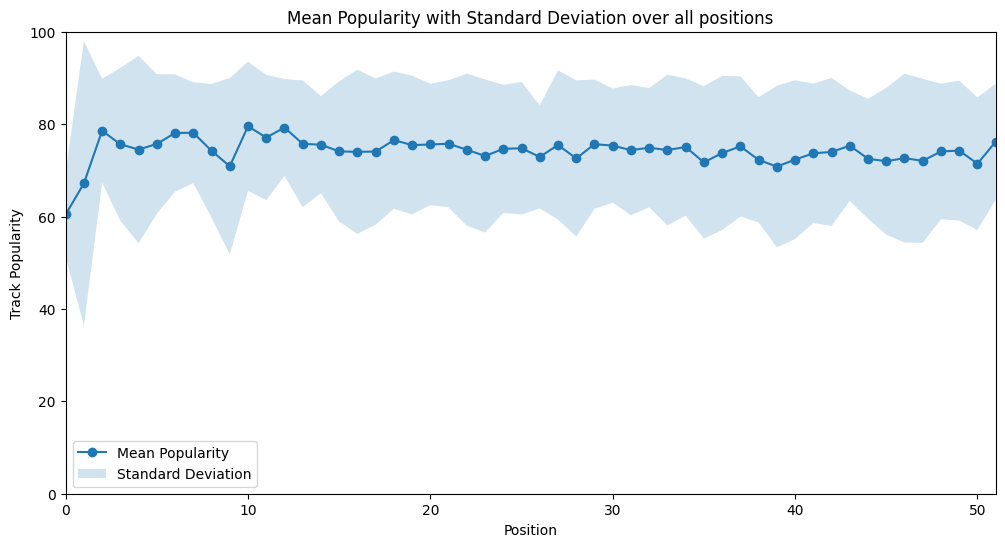

In [195]:
plt.figure(figsize=(12, 6))

# Plot the mean line and points
plt.plot(positional_df['position'], positional_df['popularity_mean'], marker='o', label='Mean Popularity')

# Plot the error bands (mean +/- std)
plt.fill_between(
    positional_df['position'], 
    positional_df['popularity_mean'] - positional_df['popularity_std'], 
    positional_df['popularity_mean'] + positional_df['popularity_std'], 
    alpha=0.2, 
    label='Standard Deviation'
)
# x axis limits
plt.xlim(0, 51)
plt.ylim(0, 100)
plt.xlabel('Position')
plt.ylabel('Track Popularity')
plt.title('Mean Popularity with Standard Deviation over all positions')
plt.legend()
plt.show()

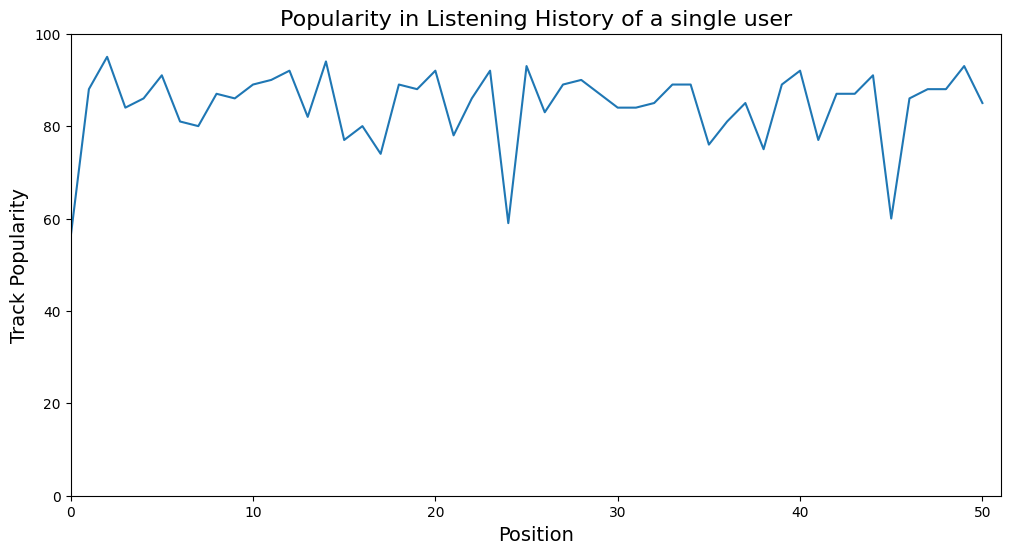

In [196]:
figure, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='position', y='popularity', data=sample, ax = ax)
# x axis limits
plt.xlim(0, 51)
plt.ylim(0, 100)
ax.set_title('Popularity in Listening History of a single user', fontsize=16)
ax.set_ylabel('Track Popularity', fontsize=14)
ax.set_xlabel('Position', fontsize=14)
plt.show()

### Shows, popularity is time independent

In [167]:
df[df['accousticness'].isna() | df['danceability'].isna() | df['energy'].isna() | df['instrumentalness'].isna() | df['liveness'].isna() | df['loudness'].isna() | df['speechiness'].isna() | df['tempo'].isna() | df['valence'].isna()].shape

(273, 24)

### There are 273 songs, which do not have songs features.
1) Should we just remove.
2) Include them by some research or from other resources. (complicated)
3) Is it belong to a specific user or participant?

In [ ]:
df.isna().sum() # (4572, 24) : 4572 - 273 = 4299 non na rows
# 273/4572 = 0.06 # 6% of the data is missing some audio features

Unnamed: 0            0
position              0
played_at             0
duration_ms           0
explicit              0
track_id              0
track_name            0
popularity            0
first_genre           0
user                  0
gender                0
age                   0
accousticness       273
danceability        273
energy              273
instrumentalness    273
key                 273
liveness            273
loudness            273
mode                273
speechiness         273
tempo               273
valence             273
artist                0
dtype: int64

In [204]:
# Feature list
features = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]

features.__len__() # 9

9

Removed, 'key' and 'mode', since these are explain by 'valance'. Related to musical scales.

In [203]:
df[features].describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000
mean,0.312194,0.587369,0.584100,0.177692,0.169114,-9.081117,0.073887,122.846997,0.448562
std,0.362703,0.188620,0.268052,0.346297,0.131582,7.958225,0.064523,29.577629,0.246794
min,0.000003,0.000000,0.001230,0.000000,0.023200,-44.761000,0.000000,0.000000,0.000000
25%,0.020300,0.470000,0.448500,0.000000,0.094000,-10.032000,0.037600,102.002000,0.235000
50%,0.113000,0.603000,0.639000,0.000019,0.118000,-5.944000,0.050000,124.970000,0.446000
75%,0.612000,0.734000,0.783000,0.017700,0.189000,-4.424000,0.076000,139.161000,0.632000
max,0.996000,0.980000,0.996000,0.972000,0.886000,-1.654000,0.488000,206.247000,0.972000


In [201]:
sorted(df['mode'].unique())  # 12 unique keys (0 to 11)

[np.float64(0.0), np.float64(nan), np.float64(1.0)]

In [205]:
df.keys()

Index(['Unnamed: 0', 'position', 'played_at', 'duration_ms', 'explicit',
       'track_id', 'track_name', 'popularity', 'first_genre', 'user', 'gender',
       'age', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'valence', 'artist'],
      dtype='object')

In [206]:
df.head()

,Unnamed: 0,position,played_at,duration_ms,explicit,track_id,track_name,popularity,first_genre,user,gender,age,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist
0,0,0,2025-10-1T01:00:00:000Z,383972,False,7p6oXzBSPAXXz8Xb8gBPki,Subzero - Original Mix,45,3,19befa2d20a544b3819a1236cf7536c4_Harsh1,F,20,0.58800,0.793,0.608,0.8610,6.0,0.0991,-11.638,0.0,0.0673,124.988,0.118,Ben Klock
1,1,0,2025-10-1T01:00:00:000Z,315426,False,40gRh2ZURv5tYBo8yB9Lu3,"Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N...",70,5,df734b2f512a4a46ab6ed07e3b948f45_Yanyi2005,M,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Ludwig van Beethoven, Paul Lewis"
2,2,0,2025-10-1T01:00:00:000Z,254200,False,3ENHpbTuY72FukZbwGP6bc,Tear Away,67,4,d78a185d41ba4097b0601c57ca3dcfd0_Monika_01,F,40,0.00055,0.611,0.648,0.0028,0.0,0.0846,-4.579,1.0,0.0441,132.983,0.457,Drowning Pool
3,3,0,2025-10-1T01:00:00:000Z,254200,False,3ENHpbTuY72FukZbwGP6bc,Tear Away,67,4,25ed4027297c4edfad6b476241db694e_FionaCamps,F,20,0.00055,0.611,0.648,0.0028,0.0,0.0846,-4.579,1.0,0.0441,132.983,0.457,Drowning Pool
4,4,0,2025-10-1T01:00:00:000Z,254200,False,3ENHpbTuY72FukZbwGP6bc,Tear Away,67,4,b32e896539eb4b25856361076a3d14c1_Daniel,M,40,0.00055,0.611,0.648,0.0028,0.0,0.0846,-4.579,1.0,0.0441,132.983,0.457,Drowning Pool
